In [1]:
%matplotlib inline
from pylab import *
import math
import numpy as np
from scipy import interpolate

import detectorgeometry_trap as geom_trap
reload(geom_trap)

import decay_properties as decay
reload(decay)

import trigger_properties as RF
reload(RF)

phi_src = radians(180)
h = 35.5 #km
R = 6356. # km
ice =4
theta_view = radians(1) #degrees
N = 100000 # number of samples 1000000
E_nu = 18 #log energy in eV of incident neutrino 
E_cut = 14
f_lo = 180
f_high = 1200
Gain_dB = 10
Nphased = 1
Epk_to_pk_threshold = 284e-6

In [6]:
decay_med=[]
dist_med = []
eng_med=[]
frac=[]

eng_hi=[]
eng_low=[]

start = 50 
end = 90 
steps=160 
x2 = np.linspace(-(90-start),-(90-end),steps)

for j in range(0,steps):
    theta_src = radians(start+(end-start)*float(j)/steps)
    geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
    
    print  round(degrees(theta_src),2)
    
    decay_cuts = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                             norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0,1)
        
    A_decay,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_fractions,ret_types, ret_p_exit, A0, N0 = decay_cuts.degree_eff_area()
       
    if len(ret_exit_decay)!=0:

        TES_lo, TES_hi =decay_cuts.TES.get_closest_indices(np.degrees(decay_cuts.exit[0]), decay_cuts.TES.th_exit)
#         print TES_lo, decay_cuts.TES.th_exit[TES_lo], len(decay_cuts.TES.data_array[TES_lo])
#         print TES_hi, decay_cuts.TES.th_exit[TES_hi], len(decay_cuts.TES.data_array[TES_hi])
        
        median_decay = np.median(ret_exit_decay)
        median_energy=np.median(ret_tau_energy)
        median_dist = np.median(ret_exit_obs)
        
        ratio = (10**median_energy) /(10**17)
        lamb = 4.9 * ratio
        fraction = 1 - exp(-median_dist/lamb)        
        decay_med.append(median_decay)
        dist_med.append(median_dist)
        eng_med.append(median_energy)
        frac.append(fraction)
        
        eng_hi.append(max(ret_tau_energy))
        eng_low.append(min(ret_tau_energy))
    else:
        decay_med.append(0)
        dist_med.append(0)
        eng_med.append(0)
        frac.append('nan')
        eng_hi.append(0)
        eng_low.append(0)


50.0
50.25
50.5
50.75
51.0
51.25
51.5
51.75
52.0
52.25
52.5
52.75
53.0
53.25
53.5
53.75
54.0
54.25
54.5
54.75
55.0
55.25
55.5
55.75
56.0
56.25
56.5
56.75
57.0
57.25
57.5
57.75
58.0
58.25
58.5
58.75
59.0
59.25
59.5
59.75
60.0
60.25
60.5
60.75
61.0
61.25
61.5
61.75
62.0
62.25
62.5
62.75
63.0
63.25
63.5
63.75
64.0
64.25
64.5
64.75
65.0
65.25
65.5
65.75
66.0
66.25
66.5
66.75
67.0
67.25
67.5
67.75
68.0
68.25
68.5
68.75
69.0
69.25
69.5
69.75
70.0
70.25
70.5
70.75
71.0
71.25
71.5
71.75
72.0
72.25
72.5
72.75
73.0
73.25
73.5
73.75
74.0
74.25
74.5
74.75
75.0
75.25
75.5
75.75
76.0
76.25
76.5
76.75
77.0
77.25
77.5
77.75
78.0
78.25
78.5
78.75
79.0
79.25
79.5
79.75
80.0
80.25
80.5
80.75
81.0
81.25
81.5
81.75
82.0
82.25
82.5
82.75
83.0
83.25
83.5
83.75


detectorgeometry_trap.py:35: RuntimeWarning: invalid value encountered in arcsin
  arg = np.arcsin((self.R+self.h) * np.sin(nadir) / self.R)


84.0
84.25
84.5
84.75
85.0
85.25
85.5
85.75
86.0
86.25
86.5
86.75
87.0
87.25
87.5
87.75
88.0
88.25
88.5
88.75
89.0
89.25
89.5
89.75


### Make Graph of median tau energy by elevation angle (at 10**18 eV)



In [7]:
for k in range(len(eng_low)):
    print start+(end-start)*float(k)/steps, eng_low[k], eng_med[k], eng_hi[k]

50.0 14.670901197077292 15.662583357698384 16.515604247459052
50.25 14.233229370791562 15.583867503242248 16.507490523116246
50.5 14.67079746452827 15.617467490593192 16.47657488418929
50.75 14.781076754336144 15.6221410678053 16.539852276975836
51.0 14.906434090904849 15.644641050107051 16.380320340777146
51.25 14.377332581398665 15.668253956156462 16.54719356228619
51.5 14.581523191950104 15.651776306603786 16.45673721740274
51.75 14.752170440830334 15.606445872417215 16.328213534038106
52.0 14.484624605422638 15.676547751404806 16.41381555684263
52.25 14.440987010330844 15.640098936003364 16.430483571160586
52.5 14.475803806596907 15.655087996724683 16.37196865442018
52.75 14.51248764719593 15.631579161048851 16.562482214275995
53.0 14.179900088425143 15.703228740926804 16.47750465117268
53.25 14.404101818580862 15.691817366704402 16.473436078243687
53.5 14.872815307981469 15.688001446438761 16.47223509999
53.75 14.861812364651911 15.724895568307701 16.513938799791447
54.0 14.834456

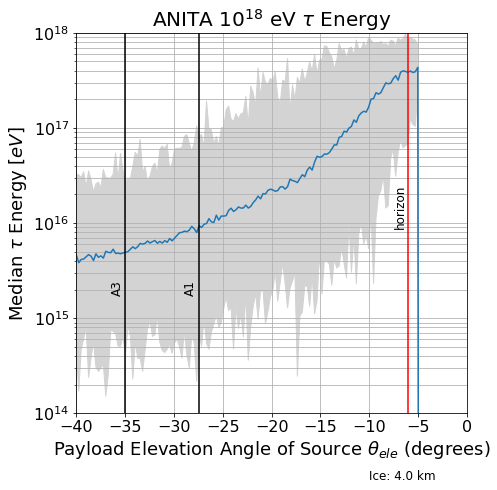

In [8]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(yscale='log')
# start = 50 
# end = 90 # maximum source declination in degrees
# steps=40 # divisions indeclination used to generate plot
# x = np.linspace(-(90-start),-(90-end),steps)

eng_med =np.nan_to_num(eng_med)
eng_med_log = [10**eng_med[j] for j in range(len(eng_med))]
eng_low_log = [10**eng_low[j] for j in range(len(eng_med))]
eng_hi_log = [10**eng_hi[j] for j in range(len(eng_med))]
ax.plot(x2, eng_med_log)

# ax.plot(x, eng_low_)
# ax.plot(x, eng_hi)
plt.fill_between(x2, eng_low_log,eng_hi_log,color='lightgray')
horizon = degrees(np.arcsin(R / (R+h)))-90
plt.xlim(-40,0)  
plt.ylim(10**14,10**18)
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel("Median "+r'$\tau}$'+" Energy "+r'$[eV]$', fontsize=18)
plt.title("ANITA "+r'$10^{18}$'+" eV "+r'$\tau}$'+" Energy", fontsize=20)

plt.text(-7.5,2*10**16,'horizon',rotation=90,fontsize=12)
plt.text(-29,2*10**15,'A1',rotation=90,fontsize=12)
plt.text(-36.5,2*10**15,'A3',rotation=90,fontsize=12)
plt.text(-10,2*10**13,'Ice: 4.0 km',fontsize=12)
horizon = degrees(np.arcsin(R / (R+h)))-90
A1 = -27.4
A3 = -35
plt.axvline(x=horizon,color='r')
plt.axvline(x=A1,color='k')
plt.axvline(x=A3,color='k')
#plt.legend(["Median Decay Distance", "Median Distance Exit-ANITA"])

ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

# y_min =min(eng_med_log)
# y_max = max(eng_med_log)
# print y_min, y_max
# y_ticks = [10**x for x in range(int(round(math.log10(10**0))),int(round(math.log10(y_max)))+1)]
# plt.yticks(y_ticks)
ax.grid(True,which='both')
#plt.semilogy()
plt.show()

In [19]:
start = 50 
end = 90 
steps=40 
x2 = np.linspace(-(90-start),-(90-end),steps)

exits=[]
y=[]
z=[]

for j in range(0,steps):
    theta_src = radians(start+(end-start)*float(j)/steps)
    geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
    
    decay_cuts = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                             norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0,1)
        
    A_decay,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_fractions,ret_types, ret_p_exit, A0, N0 = decay_cuts.degree_eff_area()
    
    TES_lo, TES_hi =decay_cuts.TES.get_closest_indices(np.degrees(decay_cuts.exit[0]), decay_cuts.TES.th_exit)
    exit = decay_cuts.TES.th_exit[TES_lo]
    
    if exit not in exits:
        exits.append(exit)
        y.append(median(decay_cuts.TES.data_array[TES_lo]))
        z.append(median(ret_exit_obs))
        print round(degrees( theta_src),2), exit, median(decay_cuts.TES.data_array[TES_lo]), median(ret_exit_obs)


50.0 50.0 15.55425 55.465093490021175
51.0 51.0 15.621455000000001 56.6514106693103
52.0 52.0 15.63176 58.0227388775144
53.0 53.0 15.62046 59.32382578335536
54.0 54.0 15.78848 60.699847601035444
55.0 55.0 15.59237 62.241824680378656
56.0 56.0 15.706610000000001 63.96971929986977
57.0 57.0 15.805695 65.79002026187936
58.0 58.0 15.79749 67.50660199755183
59.0 59.0 15.846975 69.516491460196
60.0 60.0 15.79582 71.58243804419509
61.0 61.0 15.93134 73.91894808577464
62.0 62.0 15.93985 76.38479583059355
63.0 63.0 15.948875 79.03949543068427
64.0 64.0 16.03515 81.93804666955992
65.0 65.0 16.0808 85.25497257201371
66.0 66.0 16.10735 88.65106554143344
67.0 67.0 16.16561 92.77853870168722
68.0 68.0 16.20327 96.58683456094843
69.0 69.0 16.25301 100.96573850142858
70.0 70.0 16.327685 106.36990770479272
71.0 71.0 16.33656 111.96625610482249
72.0 73.0 16.41249 118.42145624594333
73.0 74.0 16.47439 125.71500529090837
74.0 75.0 16.617 134.31823022601927
75.0 76.0 16.66832 144.15250745062954
76.0 77.0 1

IndexError: index 0 is out of bounds for axis 0 with size 0

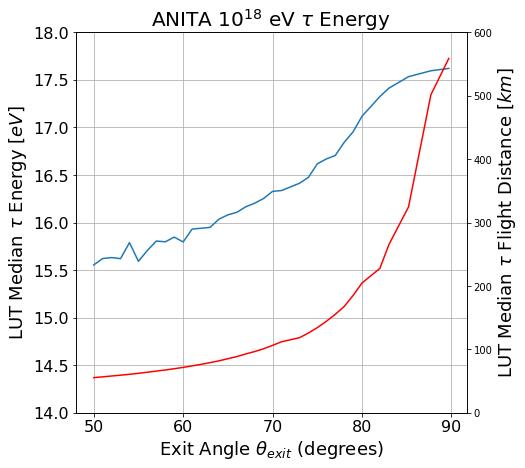

In [24]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()

ax.plot(exits, y)

horizon = degrees(np.arcsin(R / (R+h)))-90
#plt.xlim(-40,0)  
plt.ylim(14,18)
plt.xlabel("Exit Angle "+r'$\theta_{exit}$'+" (degrees)", fontsize=18)
plt.ylabel("LUT Median "+r'$\tau}$'+" Energy "+r'$[eV]$', fontsize=18)
plt.title("ANITA "+r'$10^{18}$'+" eV "+r'$\tau}$'+" Energy", fontsize=20)

# plt.text(-7.5,2*10**16,'horizon',rotation=90,fontsize=12)
# plt.text(-29,2*10**15,'A1',rotation=90,fontsize=12)
# plt.text(-36.5,2*10**15,'A3',rotation=90,fontsize=12)
# #plt.text(-10,2*10**13,'Ice: 4.0 km',fontsize=12)
# horizon = degrees(np.arcsin(R / (R+h)))-90
# A1 = -27.4
# A3 = -35
# plt.axvline(x=horizon,color='r')
# plt.axvline(x=A1,color='k')
# plt.axvline(x=A3,color='k')
#plt.legend(["Median Decay Distance", "Median Distance Exit-ANITA"])

ax2 = ax.twinx() 
ax2.plot(exits, z, color = "red")
ax2.set_ylim(0, 600)
ax2.set_ylabel("LUT Median "+r'$\tau}$'+" Flight Distance "+r'$[km]$', fontsize=18)

ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

# y_min =min(eng_med_log)
# y_max = max(eng_med_log)
# print y_min, y_max
# y_ticks = [10**x for x in range(int(round(math.log10(10**0))),int(round(math.log10(y_max)))+1)]
# plt.yticks(y_ticks)
ax.grid(True,which='both')
#plt.semilogy()
plt.show()